In [14]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, plot_confusion_matrix, roc_auc_score, balanced_accuracy_score, mean_squared_error, r2_score
import itertools
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(123)
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# Train/Test Split
X = pd.read_csv("X_re.csv")
y = pd.read_csv("y_re.csv")

In [4]:
from sklearn.model_selection import train_test_split

# split our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
# Standardization
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=list(X_train.columns))
X_test = pd.DataFrame(scaler.transform(X_test), columns=list(X_test.columns))

In [6]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y_train_nn = label_encoder.fit_transform(y_train)
y_test_nn = label_encoder.fit_transform(y_test)

x_train_ann = X_train
x_test_ann = X_test

In [7]:
num_classes = 3
y_train_ann = utils.to_categorical(y_train_nn, num_classes)
y_test_ann = utils.to_categorical(y_test_nn, num_classes)
num_features = x_test_ann.shape[1]
num_classes = y_train_ann.shape[1]

In [8]:
ann_model3 = tf.keras.Sequential()
ann_model3.add(Dense(512, kernel_initializer='normal', activation='relu', input_shape=(27,)))
ann_model3.add(Dense(64, kernel_initializer='normal', activation='relu'))
ann_model3.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
ann_model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
history3 = ann_model3.fit(x_train_ann, y_train_ann, validation_data=(x_test_ann,y_test_ann), epochs=5, batch_size=200, verbose=1)

Epoch 1/5
14003/14003 [==============================] - 41s 3ms/step - loss: 0.9015 - accuracy: 0.5595 - val_loss: 0.8729 - val_accuracy: 0.5792
Epoch 2/5
14003/14003 [==============================] - 43s 3ms/step - loss: 0.8380 - accuracy: 0.6002 - val_loss: 0.8190 - val_accuracy: 0.6111
Epoch 3/5
14003/14003 [==============================] - 42s 3ms/step - loss: 0.7948 - accuracy: 0.6251 - val_loss: 0.7860 - val_accuracy: 0.6295
Epoch 4/5
14003/14003 [==============================] - 43s 3ms/step - loss: 0.7648 - accuracy: 0.6409 - val_loss: 0.7611 - val_accuracy: 0.6433
Epoch 5/5
14003/14003 [==============================] - 40s 3ms/step - loss: 0.7426 - accuracy: 0.6524 - val_loss: 0.7421 - val_accuracy: 0.6519


In [10]:
score3 = ann_model3.evaluate(x_test_ann, y_test_ann, verbose=1)
print('Test loss: ', score3[0])
print('Test Accuracy:: ', score3[1])

21880/21880 [==============================] - 30s 1ms/step - loss: 0.7421 - accuracy: 0.6519
Test loss:  0.7420703768730164
Test Accuracy::  0.6518652439117432


In [11]:
ann_train = ann_model3.predict(x_train_ann)
prediction = ann_model3.predict(x_test_ann)


21880/21880 [==============================] - 30s 1ms/step


In [12]:
ann_train1 = np.argmax(ann_train, axis=1)+1
predictions1=np.argmax(prediction, axis=1)+1

In [16]:
def plot_cf(y_true, y_pred, class_names=None, model_name=None):
    """Plots a confusion matrix"""
    fig, ax = plt.subplots(figsize=(12, 6))
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    #class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')
    plt.colorbar()
    plt.show()

              precision    recall  f1-score   support

           1       0.74      0.79      0.77    933903
           2       0.58      0.56      0.57    933352
           3       0.64      0.62      0.63    933281

    accuracy                           0.66   2800536
   macro avg       0.66      0.66      0.66   2800536
weighted avg       0.66      0.66      0.66   2800536

              precision    recall  f1-score   support

           1       0.74      0.79      0.76    232987
           2       0.57      0.55      0.56    233538
           3       0.64      0.62      0.63    233609

    accuracy                           0.65    700134
   macro avg       0.65      0.65      0.65    700134
weighted avg       0.65      0.65      0.65    700134



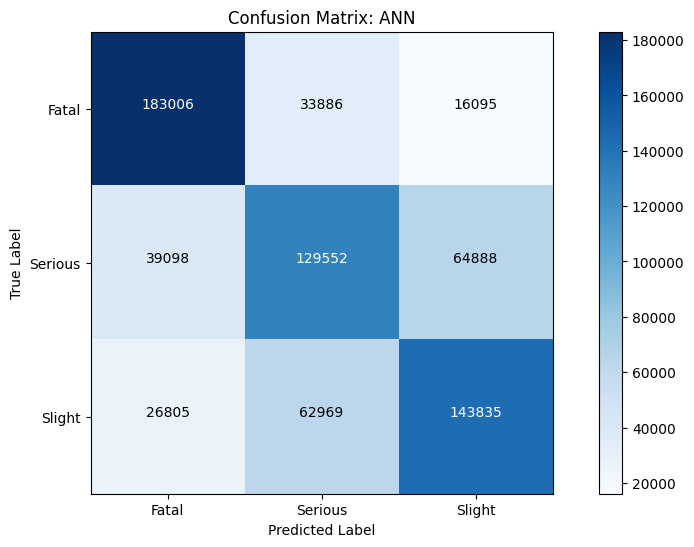

In [18]:
print(classification_report(y_train, ann_train1))
print(classification_report(y_test, predictions1))
plot_cf(y_test, predictions1, model_name='ANN', class_names=['Fatal', 'Serious','Slight'])